In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

In [ ]:
df_spot=pd.read_csv("./nifty_underlying.csv")

In [3]:
df_spot

,open,high,low,close,volume,datetime
0,12204.8999,12216.2000,12201.5000,12215.2000,0.0,2020-01-01 09:15:00
1,12214.8999,12216.3999,12205.0000,12206.2999,0.0,2020-01-01 09:16:00
2,12206.5000,12207.5000,12202.5000,12203.5000,0.0,2020-01-01 09:17:00
3,12203.0000,12208.7000,12201.2000,12208.2999,0.0,2020-01-01 09:18:00
4,12208.2999,12213.3999,12207.3999,12211.5000,0.0,2020-01-01 09:19:00
...,...,...,...,...,...,...
505320,25129.9500,25132.7500,25127.8000,25129.3500,0.0,2025-06-11 15:25:00
505321,25130.6000,25133.4000,25129.3500,25131.4000,0.0,2025-06-11 15:26:00
505322,25130.9500,25132.8000,25125.8000,25126.6000,0.0,2025-06-11 15:27:00
505323,25128.3000,25131.6000,25126.9000,25127.9500,0.0,2025-06-11 15:28:00


In [4]:
df_spot["datetime"]=pd.to_datetime(df_spot["datetime"])
df_spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505325 entries, 0 to 505324
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   open      505325 non-null  float64       
 1   high      505325 non-null  float64       
 2   low       505325 non-null  float64       
 3   close     505325 non-null  float64       
 4   volume    505325 non-null  float64       
 5   datetime  505325 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 23.1 MB


In [5]:
df_spot.set_index("datetime")

,open,high,low,close,volume
datetime,,,,,
2020-01-01 09:15:00,12204.8999,12216.2000,12201.5000,12215.2000,0.0
2020-01-01 09:16:00,12214.8999,12216.3999,12205.0000,12206.2999,0.0
2020-01-01 09:17:00,12206.5000,12207.5000,12202.5000,12203.5000,0.0
2020-01-01 09:18:00,12203.0000,12208.7000,12201.2000,12208.2999,0.0
2020-01-01 09:19:00,12208.2999,12213.3999,12207.3999,12211.5000,0.0
...,...,...,...,...,...
2025-06-11 15:25:00,25129.9500,25132.7500,25127.8000,25129.3500,0.0
2025-06-11 15:26:00,25130.6000,25133.4000,25129.3500,25131.4000,0.0
2025-06-11 15:27:00,25130.9500,25132.8000,25125.8000,25126.6000,0.0


In [6]:
df_spot_dec = df_spot[
    (df_spot["datetime"] >= "2023-12-01") & (df_spot["datetime"] <= "2023-12-31")
]
df_spot_dec

,open,high,low,close,volume,datetime
364112,20194.10,20216.75,20183.70,20212.45,0.0,2023-12-01 09:15:00
364113,20208.75,20212.45,20199.70,20208.55,0.0,2023-12-01 09:16:00
364114,20209.00,20215.05,20202.95,20215.05,0.0,2023-12-01 09:17:00
364115,20216.40,20225.30,20215.25,20223.10,0.0,2023-12-01 09:18:00
364116,20221.35,20225.75,20219.10,20220.10,0.0,2023-12-01 09:19:00
...,...,...,...,...,...,...
371607,21723.35,21729.15,21722.50,21727.25,0.0,2023-12-29 15:25:00
371608,21726.00,21731.45,21725.10,21730.90,0.0,2023-12-29 15:26:00
371609,21731.20,21738.40,21729.35,21736.30,0.0,2023-12-29 15:27:00
371610,21736.40,21739.35,21729.65,21734.65,0.0,2023-12-29 15:28:00


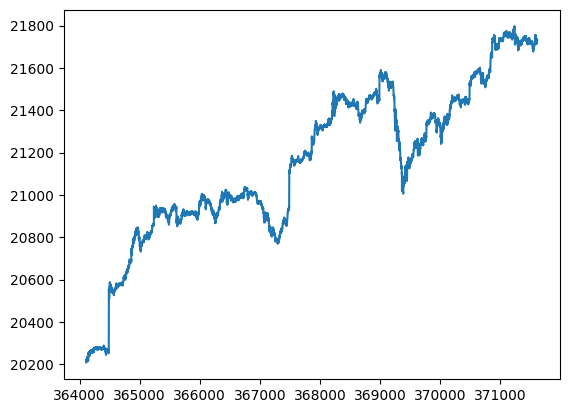

In [7]:
plt.plot(df_spot_dec["close"])

In [8]:
def compute_indicators(df):
    df['rolling_mean'] = df['close'].rolling(20).mean()
    df['rolling_std'] = df['close'].rolling(20).std()
    df['bb_width'] = (4 * df['rolling_std']) / df['rolling_mean']

    return df

In [9]:
df_spot=compute_indicators(df_spot_dec)

C:\Users\seema\AppData\Local\Temp\ipykernel_1836\56323785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_mean'] = df['close'].rolling(20).mean()
C:\Users\seema\AppData\Local\Temp\ipykernel_1836\56323785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_std'] = df['close'].rolling(20).std()
C:\Users\seema\AppData\Local\Temp\ipykernel_1836\56323785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [10]:
df_spot['BBW_Threshold'] = df_spot['bb_width'].rolling(window=20).quantile(0.2)

C:\Users\seema\AppData\Local\Temp\ipykernel_1836\2030857022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spot['BBW_Threshold'] = df_spot['bb_width'].rolling(window=20).quantile(0.2)


In [11]:
df_spot['Time'] = df_spot['datetime'].dt.time
df_spot['Signal'] = ((df_spot['bb_width'] < df_spot['BBW_Threshold'])).astype(int)
df_spot.dropna(inplace=True)
def round_to_strike(price, interval=100):
    return int(int(price / interval) * interval)

# Apply only on signal rows, NaN otherwise
df_spot['ATM_Strike'] = np.where(
    df_spot['Signal'] == 1,
    df_spot['close'].apply(lambda x: round_to_strike(x, 100)),
    np.nan
)

C:\Users\seema\AppData\Local\Temp\ipykernel_1836\2814855434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spot['Time'] = df_spot['datetime'].dt.time
C:\Users\seema\AppData\Local\Temp\ipykernel_1836\2814855434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spot['Signal'] = ((df_spot['bb_width'] < df_spot['BBW_Threshold'])).astype(int)
C:\Users\seema\AppData\Local\Temp\ipykernel_1836\2814855434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [12]:
df_spot['ATM_Strike'] = df_spot['ATM_Strike'].ffill()
df_spot.dropna(inplace=True)
len(df_spot)

C:\Users\seema\AppData\Local\Temp\ipykernel_1836\3408110716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spot['ATM_Strike'] = df_spot['ATM_Strike'].ffill()
C:\Users\seema\AppData\Local\Temp\ipykernel_1836\3408110716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spot.dropna(inplace=True)


7447

In [27]:
def round_to_strike(price, interval=100):
    return int(int(price / interval) * interval)

# Apply only on signal rows, NaN otherwise
df_spot['ATM_Strike'] = np.where(
    df_spot['Signal'] == 1,
    df_spot['close'].apply(lambda x: round_to_strike(x, 100)),
    np.nan
)

C:\Users\seema\AppData\Local\Temp\ipykernel_1836\4059173970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spot['ATM_Strike'] = np.where(


In [29]:
df_spot['ATM_Strike'] = df_spot['ATM_Strike'].ffill()
df_spot.dropna(inplace=True)
len(df_spot)

C:\Users\seema\AppData\Local\Temp\ipykernel_1836\3408110716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spot['ATM_Strike'] = df_spot['ATM_Strike'].ffill()
C:\Users\seema\AppData\Local\Temp\ipykernel_1836\3408110716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spot.dropna(inplace=True)


7447

In [39]:
df_spot

,open,high,low,close,volume,datetime,rolling_mean,rolling_std,bb_width,BBW_Threshold,Time,Signal,ATM_Strike
364165,20246.00,20246.80,20238.75,20238.75,0.0,2023-12-01 10:08:00,20249.4300,7.251795,0.001432,0.001642,10:08:00,1,20200.0
364166,20239.90,20246.60,20234.60,20246.15,0.0,2023-12-01 10:09:00,20250.1225,6.099665,0.001205,0.001642,10:09:00,1,20200.0
364167,20245.65,20248.40,20241.95,20244.60,0.0,2023-12-01 10:10:00,20250.4175,5.643797,0.001115,0.001642,10:10:00,1,20200.0
364168,20243.15,20261.20,20239.55,20259.25,0.0,2023-12-01 10:11:00,20251.3500,5.474510,0.001081,0.001642,10:11:00,1,20200.0
364169,20260.70,20263.55,20257.45,20259.75,0.0,2023-12-01 10:12:00,20251.9875,5.679809,0.001122,0.001387,10:12:00,1,20200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371607,21723.35,21729.15,21722.50,21727.25,0.0,2023-12-29 15:25:00,21727.7800,7.141694,0.001315,0.001464,15:25:00,1,21700.0
371608,21726.00,21731.45,21725.10,21730.90,0.0,2023-12-29 15:26:00,21727.3675,6.673303,0.001229,0.001453,15:26:00,1,21700.0
371609,21731.20,21738.40,21729.35,21736.30,0.0,2023-12-29 15:27:00,21727.2375,6.458692,0.001189,0.001411,15:27:00,1,21700.0
371610,21736.40,21739.35,21729.65,21734.65,0.0,2023-12-29 15:28:00,21727.2225,6.440159,0.001186,0.001357,15:28:00,1,21700.0


In [30]:
month_map = {
    1: '01Jan', 2: '02Feb', 3: '03Mar', 4: '04Apr',
    5: '05May', 6: '06Jun', 7: '07Jul', 8: '08Aug',
    9: '09Sep', 10: '10Oct', 11: '11Nov', 12: '12Dec'
}
from tqdm import tqdm
#  Config
expiry_map = {
    "01Jan": "2023-01-25",
    "02Feb": "2023-02-23",
    "03Mar": "2023-03-29",
    "04Apr": "2023-04-27",
    "05May": "2023-05-25",
    "06Jun": "2023-06-28",
    "07Jul": "2023-07-27",
    "08Aug": "2023-08-31",
    "09Sep": "2023-09-28",
    "10Oct": "2023-10-26",
    "11Nov": "2023-11-30",
    "12Dec": "2023-12-28"
}

month_map = {
    1: '01Jan', 2: '02Feb', 3: '03Mar', 4: '04Apr',
    5: '05May', 6: '06Jun', 7: '07Jul', 8: '08Aug',
    9: '09Sep', 10: '10Oct', 11: '11Nov', 12: '12Dec'
}

def round_to_strike(price, interval=100):
    return int(round(price / interval) * interval)


In [ ]:
#  Initialize Variables
nifty_df = df_spot  # This has columns: datetime, close, Signal
base_path = "./"
initial_capital = 100000
capital = initial_capital
capital_per_trade = 10000
lot_size = 50

pnl_list = []
capital_series = []
win_trades = 0
trade_log = []
option_cache = {}
in_trade = False

# Trade state variables
current_trade = {
    "signal_time": None,
    "strike": None,
    "expiry_date_str": None,
    "ce_price_entry": None,
    "pe_price_entry": None,
    "entry_nifty": None,
    "num_lots": None,
    "entry_cost": None,
    "ce_df": None,
    "pe_df": None
}

capital_list=[]

In [25]:
import os
#  Config
expiry_map = {
    "01Jan": "2023-01-25",
    "02Feb": "2023-02-23",
    "03Mar": "2023-03-29",
    "04Apr": "2023-04-27",
    "05May": "2023-05-25",
    "06Jun": "2023-06-28",
    "07Jul": "2023-07-27",
    "08Aug": "2023-08-31",
    "09Sep": "2023-09-28",
    "10Oct": "2023-10-26",
    "11Nov": "2023-11-30",
    "12Dec": "2023-12-28"
}

month_map = {
    1: '01Jan', 2: '02Feb', 3: '03Mar', 4: '04Apr',
    5: '05May', 6: '06Jun', 7: '07Jul', 8: '08Aug',
    9: '09Sep', 10: '10Oct', 11: '11Nov', 12: '12Dec'
}

def round_to_strike(price, interval=100):
    return int(round(price / interval) * interval)


In [32]:


# Backtest
for i, row in tqdm(nifty_df.iterrows(), total=len(nifty_df)):
    current_time = row["datetime"]
    capital_list.append(capital)

    # Entry condition: Signal occurs and not in trade
    if row["Signal"] and not in_trade:
        signal_time = pd.to_datetime(row["datetime"])
        strike = round_to_strike(row["close"])
        month_key = month_map[signal_time.month]
        expiry_date_str = expiry_map[month_key]
        expiry_folder = "12Dec-Nifty"
        expiry_dt = pd.to_datetime("2023-12-28") 
        ce_filename = f"{strike}_call_{expiry_dt.strftime('%Y-%m-%d')}.csv"
        pe_filename = f"{strike}_put_{expiry_dt.strftime('%Y-%m-%d')}.csv"

        # Load data
        ce_path = os.path.join(base_path, expiry_folder, ce_filename)
        pe_path = os.path.join(base_path, expiry_folder, pe_filename)

        try:
            # Load data if not cached
            if ce_path not in option_cache:
                ce_df = pd.read_csv(ce_path)
                ce_df['datetime'] = pd.to_datetime(ce_df['datetime'])
                option_cache[ce_path] = ce_df
            else:
                ce_df = option_cache[ce_path]

            if pe_path not in option_cache:
                pe_df = pd.read_csv(pe_path)
                pe_df['datetime'] = pd.to_datetime(pe_df['datetime'])
                option_cache[pe_path] = pe_df
            else:
                pe_df = option_cache[pe_path]

            # Get entry prices
            ce_entry = ce_df[ce_df["datetime"] == signal_time]
            pe_entry = pe_df[pe_df["datetime"] == signal_time]

            if ce_entry.empty or pe_entry.empty:
                continue

            ce_price_entry = ce_entry["close"].values[0]
            pe_price_entry = pe_entry["close"].values[0]

            # Calculate position size
            entry_cost = (ce_price_entry + pe_price_entry) * lot_size
            num_lots = int(capital_per_trade // entry_cost)
            trade_cost = entry_cost * num_lots
            if(num_lots==0):
                continue

            # Update trade state
            current_trade = {
                "signal_time": signal_time,
                "strike": strike,
                "expiry_date_str": expiry_date_str,
                "ce_price_entry": ce_price_entry,
                "pe_price_entry": pe_price_entry,
                "entry_nifty": row["close"],
                "num_lots": num_lots,
                "entry_cost": trade_cost,
                "ce_df": ce_df,
                "pe_df": pe_df
            }
            in_trade = True
            print(f"Entered trade at {signal_time}: Strike {strike}, Lots {num_lots}")

        except Exception as e:
            print(f"Trade entry failed: {str(e)}")
            continue

    # Exit conditions (only when in trade)
    if in_trade:
        # 1. Mandatory expiry exit
        expiry_date = pd.to_datetime(current_trade["expiry_date_str"]).date()
        if current_time.date() == expiry_date and current_time.time() >= pd.Timestamp("15:15:00").time():
            try:
                ce_exit = current_trade["ce_df"][
                    (current_trade["ce_df"]["datetime"].dt.date == expiry_date) &
                    (current_trade["ce_df"]["datetime"].dt.time == pd.Timestamp("15:15:00").time())
                ]
                pe_exit = current_trade["pe_df"][
                    (current_trade["pe_df"]["datetime"].dt.date == expiry_date) &
                    (current_trade["pe_df"]["datetime"].dt.time == pd.Timestamp("15:15:00").time())
                ]

                if not ce_exit.empty and not pe_exit.empty:
                    ce_price_exit = ce_exit["close"].values[0]
                    pe_price_exit = pe_exit["close"].values[0]
                    exit_reason = "Expiry"
            except:
                # Fallback to last available price
                ce_price_exit = current_trade["ce_df"]["close"].iloc[-1]
                pe_price_exit = current_trade["pe_df"]["close"].iloc[-1]
                exit_reason = "Expiry (Fallback)"

        # 2. Only keep profit-taking exit (removed stop-loss)
        else:
            try:
                ce_price_now = current_trade["ce_df"][current_trade["ce_df"]["datetime"] == current_time]["close"].values[0]
                pe_price_now = current_trade["pe_df"][current_trade["pe_df"]["datetime"] == current_time]["close"].values[0]

                current_value = (ce_price_now + pe_price_now) * lot_size * current_trade["num_lots"]
                return_pct = (current_value - current_trade["entry_cost"]) / current_trade["entry_cost"]

                # Take profit only (no stop-loss)
                if return_pct >= 0.25:  # Increased to 25% profit
                    ce_price_exit = ce_price_now
                    pe_price_exit = pe_price_now
                    exit_reason = "Profit Take"
                else:
                    # No exit condition met
                    continue
            except:
                continue

        # Calculate final PnL if exited
        exit_value = (ce_price_exit + pe_price_exit) * lot_size * current_trade["num_lots"]
        trade_pnl = exit_value - current_trade["entry_cost"]

        # Update capital
        capital += trade_pnl
        pnl_list.append(trade_pnl)
        if trade_pnl > 0:
            win_trades += 1

        # Log trade
        trade_log.append({
            "entry_time": current_trade["signal_time"],
            "exit_time": current_time,
            "exit_reason": exit_reason,
            "strike": current_trade["strike"],
            "entry_nifty": current_trade["entry_nifty"],
            "exit_nifty": row["close"],
            "ce_entry": current_trade["ce_price_entry"],
            "pe_entry": current_trade["pe_price_entry"],
            "ce_exit": ce_price_exit,
            "pe_exit": pe_price_exit,
            "num_lots": current_trade["num_lots"],
            "pnl": trade_pnl,
            "capital": capital
        })

        print(f"Exited trade: {exit_reason} | P&L: {trade_pnl:.2f}")
        in_trade = False


 83%|████████▎ | 6182/7447 [00:02<00:00, 2148.72it/s]

Entered trade at 2023-12-26 11:35:00: Strike 21500, Lots 1


 91%|█████████ | 6750/7447 [00:03<00:00, 1177.99it/s]

Exited trade: Profit Take | P&L: 2875.00
Entered trade at 2023-12-28 09:34:00: Strike 21700, Lots 1


 96%|█████████▌| 7114/7447 [00:03<00:00, 868.08it/s] 

Exited trade: Expiry | P&L: -2535.00
Entered trade at 2023-12-28 15:16:00: Strike 21800, Lots 7
Exited trade: Expiry | P&L: 315.00
Entered trade at 2023-12-28 15:17:00: Strike 21800, Lots 7
Exited trade: Expiry | P&L: -17.50
Entered trade at 2023-12-28 15:18:00: Strike 21800, Lots 7
Exited trade: Expiry | P&L: -350.00
Entered trade at 2023-12-28 15:19:00: Strike 21800, Lots 7
Exited trade: Expiry | P&L: 420.00
Entered trade at 2023-12-28 15:20:00: Strike 21800, Lots 7
Exited trade: Expiry | P&L: 385.00
Entered trade at 2023-12-28 15:21:00: Strike 21800, Lots 8
Exited trade: Expiry | P&L: 1580.00
Entered trade at 2023-12-28 15:22:00: Strike 21800, Lots 9
Exited trade: Expiry | P&L: 2160.00
Entered trade at 2023-12-28 15:23:00: Strike 21800, Lots 8
Exited trade: Expiry | P&L: 1800.00
Entered trade at 2023-12-28 15:24:00: Strike 21800, Lots 8
Exited trade: Expiry | P&L: 1740.00


100%|██████████| 7447/7447 [00:03<00:00, 1915.03it/s]


In [33]:
# ----------------------------- Results -----------------------------
print(f"\nBacktest Complete")
print(f"Total Trades: {len(trade_log)}")
print(f"Winning Trades: {win_trades}")
print(f"Win Rate: {win_trades/len(trade_log)*100:.2f}%" if trade_log else "No trades")
print(f"Final Capital: {capital:.2f}")
print(f"Total P&L: {capital - initial_capital:.2f}")

# Convert log to DataFrame
df = pd.DataFrame(trade_log)


Backtest Complete
Total Trades: 11
Winning Trades: 8
Win Rate: 72.73%
Final Capital: 108372.50
Total P&L: 8372.50


In [34]:
import pandas as pd
import numpy as np

df['exit_time'] = pd.to_datetime(df['exit_time'])

# Compute equity curve
df['cumulative_pnl'] = df['pnl'].cumsum()
df['equity_curve'] = df['capital'].iloc[0] + df['cumulative_pnl']


In [35]:
df['rolling_max'] = df['equity_curve'].cummax()
df['drawdown'] = df['equity_curve'] - df['rolling_max']
df['drawdown_pct'] = df['drawdown'] / df['rolling_max']

max_drawdown = df['drawdown_pct'].min()
print(f"Max Drawdown: {max_drawdown:.2%}")

Max Drawdown: -2.45%


In [36]:
df['log_equity'] = np.log(df['equity_curve'])
df['log_return'] = df['log_equity'].diff()
df = df.dropna()


In [37]:
risk_free_rate_annual = 0.06
minutes_per_year = 252 * 390
rf_per_minute = np.log(1 + risk_free_rate_annual) / minutes_per_year

# Excess returns
df['excess_return'] = df['log_return'] - rf_per_minute

# Sharpe Ratio
mean_excess_return = df['excess_return'].mean()
std_dev_return = df['log_return'].std()

sharpe_ratio = (mean_excess_return / std_dev_return) * np.sqrt(minutes_per_year)

print(f"Annualized Sharpe Ratio: {sharpe_ratio:.2f}")


Annualized Sharpe Ratio: 121.29


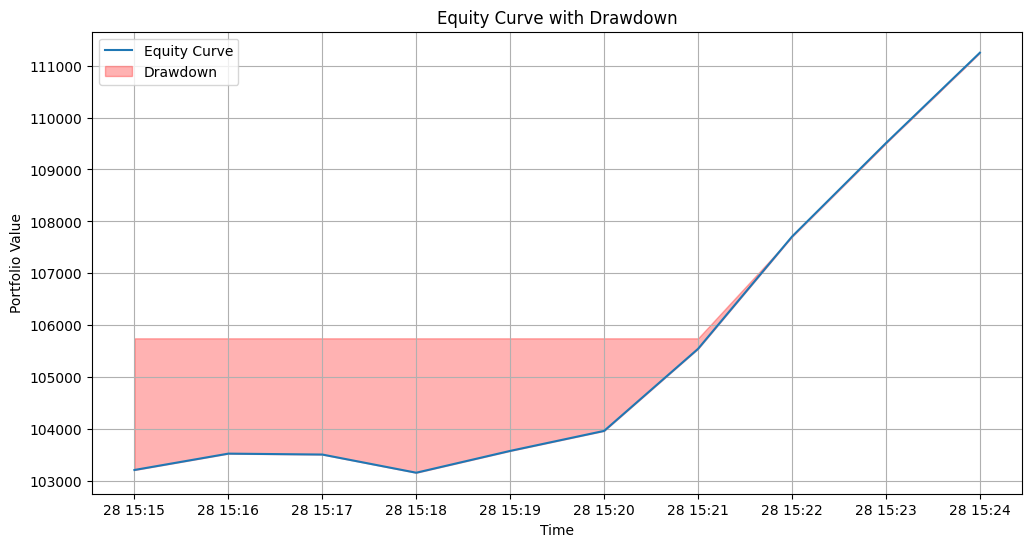

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['exit_time'], df['equity_curve'], label='Equity Curve')
plt.fill_between(df['exit_time'], df['rolling_max'], df['equity_curve'], color='red', alpha=0.3, label='Drawdown')
plt.legend()
plt.title("Equity Curve with Drawdown")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.grid()
plt.show()
